<a href="https://colab.research.google.com/github/Dinoelfantastico/librarys/blob/main/Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Dinoelfantastico/librarys.git 2>dev>null

In [5]:
from librarys.Carpeta import graphstuff as gs
from heapq import heappush as push, heappop as pop
import networkx as nx
import math

In [6]:
%%file 1.csv
0,1,2
0,2,5
0,4,6
1,2,5
1,3,3
1,4,4
2,4,4
3,4,4

Writing 1.csv


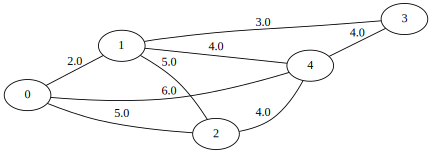

In [7]:
G = nx.read_weighted_edgelist('1.csv',delimiter=',',nodetype=int)
gs.nx2gv(G,weighted=True)

In [12]:
def Dijkstra(G,S):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['cost'] = math.inf
    G.nodes[u]['path'] = -1
  
  G.nodes[S]['cost'] = 0
  Cola = [(0,S)]
  while Cola:
    g_u,u = pop(Cola)
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      for v in G.neighbors(u):
        if not G.nodes[v]['visited']:
          w = G.edges[u,v]['weight']
          t_p = g_u+w
          g_v = G.nodes[v]['cost']
          if t_p<g_v:
            G.nodes[v]['cost'] = t_p
            G.nodes[v]['path'] = u
            push(Cola,(t_p,v))
  path = [-1]*G.number_of_nodes()
  for u in G.nodes:
    path[u] = G.nodes[u]['path']

  return path

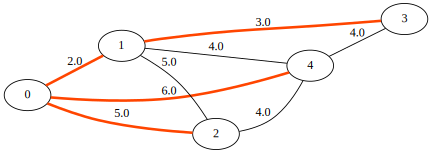

In [13]:
path = Dijkstra(G,0)
gs.nx2gv(G,weighted=True,path=path)

In [16]:
peso,camino = nx.single_source_dijkstra(G,0)
print("Nodo origen 0 y sus caminos más cortos hacia todos los nodos")
for i in range(len(peso)):
  if i!=0:
    print(f"El camino hacia {i} es {camino[i]} y su peso total es -> {peso[i]}")

Nodo origen 0 y sus caminos más cortos hacia todos los nodos
El camino hacia 1 es [0, 1] y su peso total es -> 2.0
El camino hacia 2 es [0, 2] y su peso total es -> 5.0
El camino hacia 3 es [0, 1, 3] y su peso total es -> 5.0
El camino hacia 4 es [0, 4] y su peso total es -> 6.0
